In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc
import itertools

import warnings
warnings.filterwarnings('ignore')
from mpltools import style
style.use('ggplot')

<h1>Classifying Iris Data</h1>
<p>Scikit learn has various datasets, one of which is irish classification data.  Let's build a model on a real world dataset using the scikit learn logistic regression model.  Note, this example is taken directly from:<br/>
http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py
<br/>
so if you get stuck, you can check there for a result. <br/>

We're going to modify the original example a bit.  The original example uses the entire dataset, and then displays the descision boundary using a 2D mesh.  That part of the code has been left in place so that you can see it (it is a useful visualization for 2D classifications).  We will create a train test split so that the effectiveness of our system can be measured using the techniques we discussed up to this point.
</p> <br/>
<br/>
<h2>Get the Data, Create the Model</h2>

In [2]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

<h2>Visualize Classifier</h2>
<p>As mentioned above, the technique of using a meshgrid allows us to show multidimentional descision boundaries</p>

In [3]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

<h2>Visualize Training Data</h2>
<p>Use the meshgrid to show descision boundaries on you training data.  The results should look pretty good.</p>

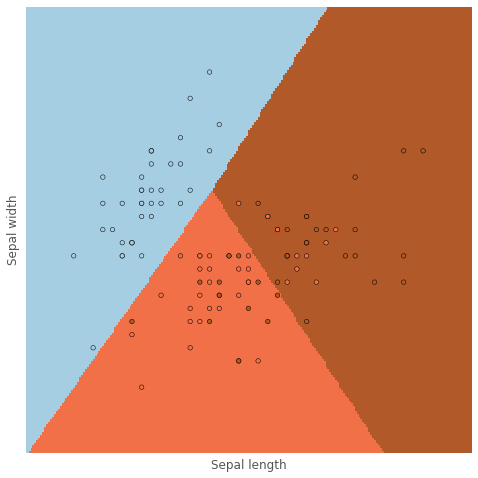

In [4]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 8))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

<h2>Visualize Test Data</h2>
<p>Same thing for test data.</p>

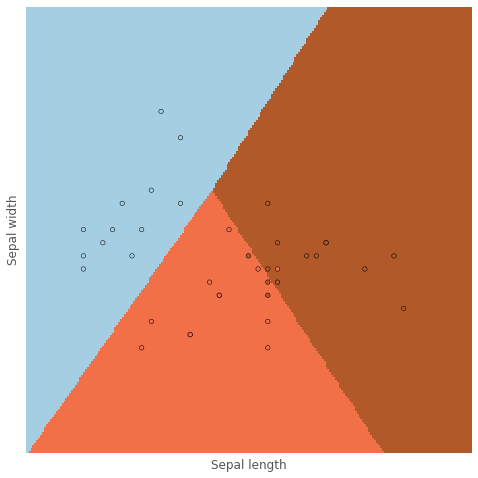

In [5]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 8))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

<h2>Create a Multi-Dimention Confusion Matrix</h2>
<p>We can still create confusion matrices for multiclassification scenarios.  Use the provided function to plot the confusion matrix.  The labels are 'setosa' (blue in my plots), 'versicolor' (orange), and 'virginica' (brown)</p>

In [6]:
#taken from 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Model accuracy 0.868421052631579
Confusion matrix, without normalization
[[12  0  0]
 [ 0 10  1]
 [ 0  4 11]]


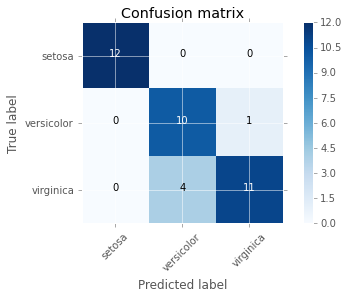

In [7]:
# Create prediction array.
preds = logreg.predict(X_test)

# Use the sklearn confusion matrix class to create a confusion matrix, call the variable "cm"
# so it works with the last line of this cell
cm = confusion_matrix(y_test, preds)

#Print the accuracy_score and f1 score
print("Model accuracy {}".format(accuracy_score(y_test, preds)))

# Defined in cell above
plot_confusion_matrix(cm, ["setosa", "versicolor", "virginica"])